<a href="https://colab.research.google.com/github/Sid-Oya/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Sidoney_Daley_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
# import these libraries in order to write code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# specify the plot style we will use - there a numerous styles which change the look of your visual
plt.style.use('fast')

In [0]:
# to find a list of other plot styles avaible
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Pandas built in visualization tool 
- for simple, quick plots


In [0]:
# continous variables =  have an infinite number of values between any two values. A continuous variable can be numeric or date/time.
# categorical variables = finite number of categories or distinct groups. Categorical data might not have a logical order.
# read in the titantic dataset

url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
titanic = pd.read_csv(url)
titanic. head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [0]:
# lets create a new categorical variable
# we will create cabin class
# this categorical variable can be displayed using number or string values
# map is meant for mapping values from one domain to another, so is optimised for performance
# we will use map to create this new variable as a set of string values

titanic['cabin_class'] = titanic['Pclass'].map({1: 'first', 2: 'second', 3: 'thrird'})
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,thrird
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,thrird
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,thrird


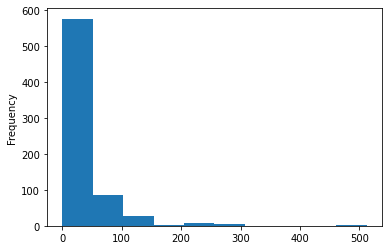

In [0]:
# lets display Fare which is a continous variable using a histogram. 
titanic['Fare'].plot(kind='hist');

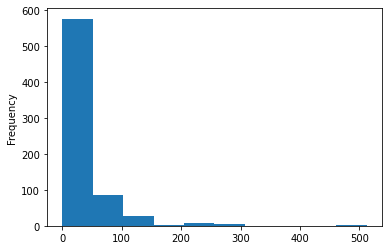

In [0]:
# the use of the ; above removes the matplotlib jargon
titanic['Fare'].plot(kind='hist')

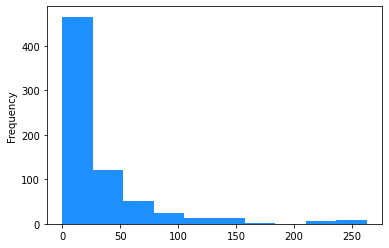

In [0]:
# let remove the extreme outliers from the histogram above

titanic = titanic[titanic['Fare']<500]
titanic['Fare'].plot(kind='hist', color='dodgerblue');

In [0]:
# we can convert a continous variable to a categorical variable by using binning
# lets create bins (must utilize the cut() function) - categories defined in mathematical notations

farebins=[0,8,15,33,512]
farelables=['low', 'medium', 'high', 'vhigh']
titanic['fare_groups']= pd.cut(titanic ['Fare'], bins=farebins, labels=farelables)
myresults = titanic['fare_groups'].value_counts().sort_index()
myresults 

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

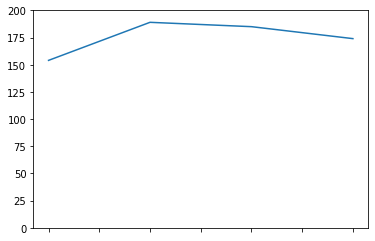

In [0]:
# sometimes it is important to specify the range of the y-axis to get more accurate results
# we will do that using limts 'lim'
myresults.plot(ylim=(0,200));

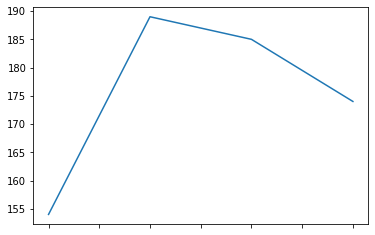

In [0]:
myresults.plot();

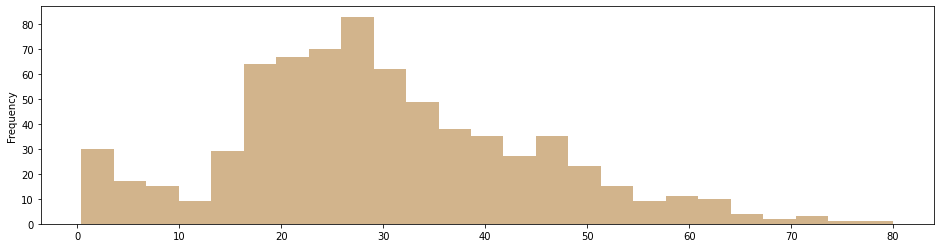

In [0]:
# lets display a single continous variable using a Histogram

titanic['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan');

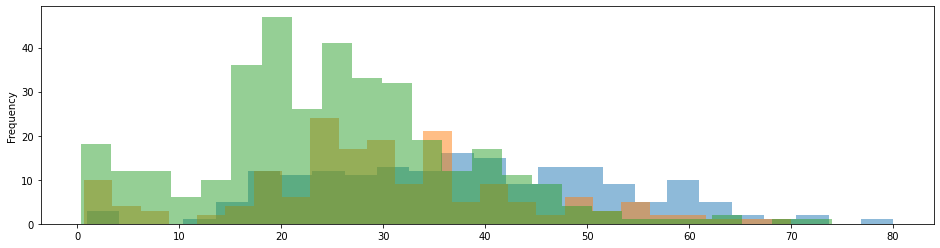

In [0]:
# lets stack Histogram of continous variable, broken ouut by categorical variable
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5);

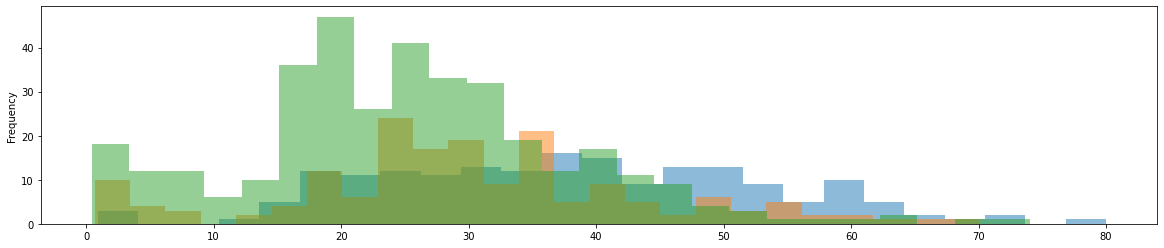

In [0]:
# adjusting figsize to widen
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(20,4), alpha=0.5)
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(20,4), alpha=0.5)
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(20,4), alpha=0.5);

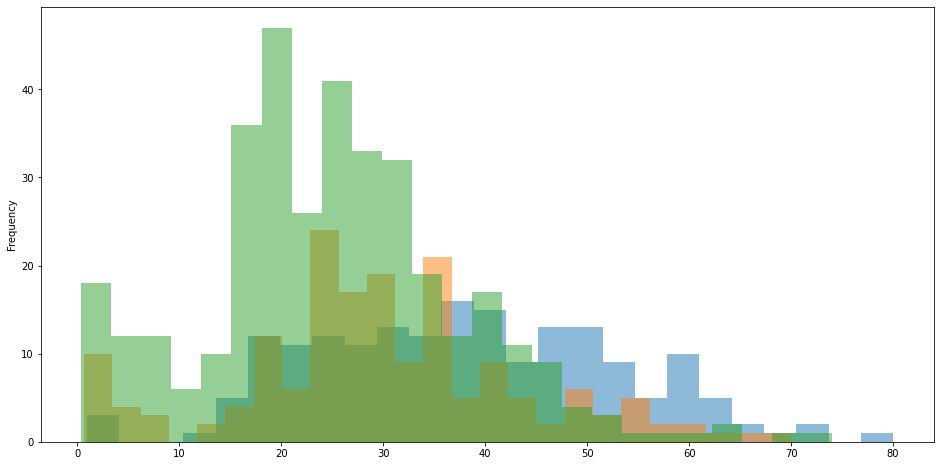

In [0]:
# adjusting figsize to elongate
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,8), alpha=0.5)
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,8), alpha=0.5)
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,8), alpha=0.5);

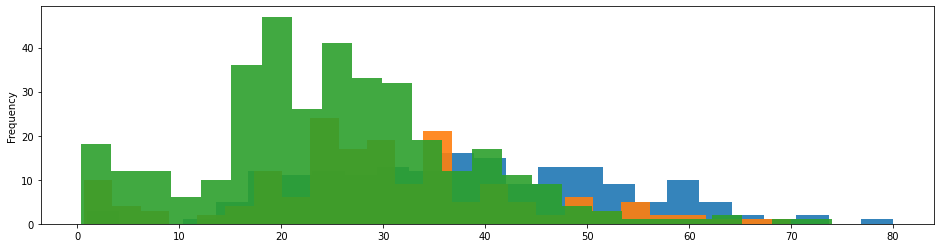

In [0]:
# adjusting alpha range of 0-1 transparency
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.9)
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.9)
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.9);

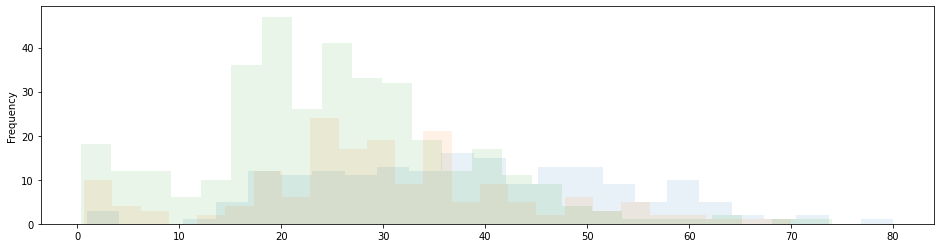

In [0]:
#  adjusting alpha range of 0-1 transparency
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.1)
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.1)
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.1);

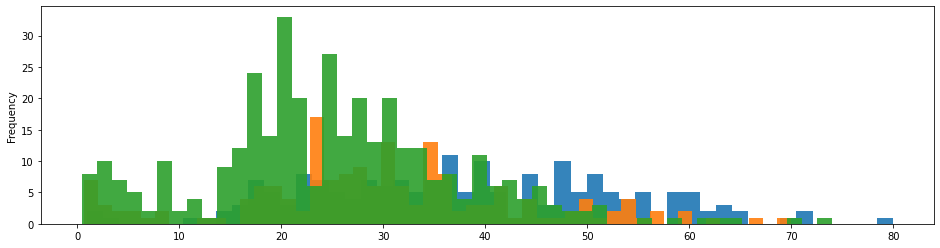

In [0]:
#  adjusting alpha range of 0-1 transparency, and number of bins
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=50, figsize=(16,4), alpha=0.9)
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist', bins=50, figsize=(16,4), alpha=0.9)
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=50, figsize=(16,4), alpha=0.9);

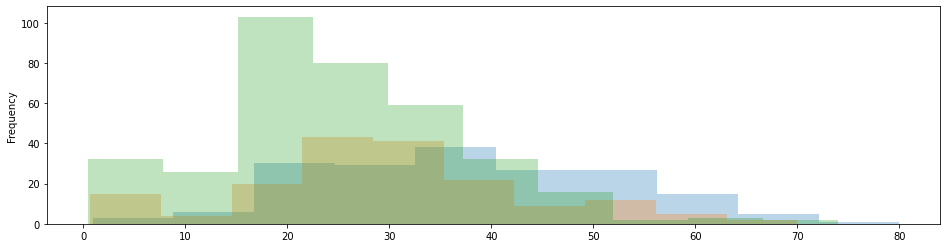

In [0]:
#  adjusting alpha range of 0-1 transparency, and number of bins
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=10, figsize=(16,4), alpha=0.3)
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist', bins=10, figsize=(16,4), alpha=0.3)
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=10, figsize=(16,4), alpha=0.3);

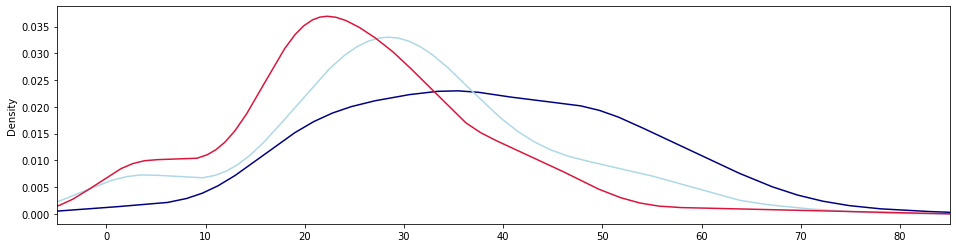

In [0]:
# lets read this data in an easier way using Kernel Density Estimate (KDE). Note the use of 'xlim'.
titanic[titanic['Pclass']==1]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='navy')
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='lightblue')
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='crimson');

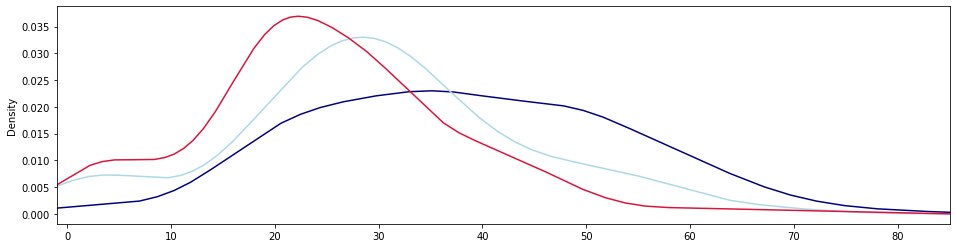

In [0]:
# adjusting xlim range
titanic[titanic['Pclass']==1]['Age'].plot(kind='density', xlim=(-1, 85), figsize=(16,4), color='navy')
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', xlim=(-1, 85), figsize=(16,4), color='lightblue')
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', xlim=(-1, 85), figsize=(16,4), color='crimson');

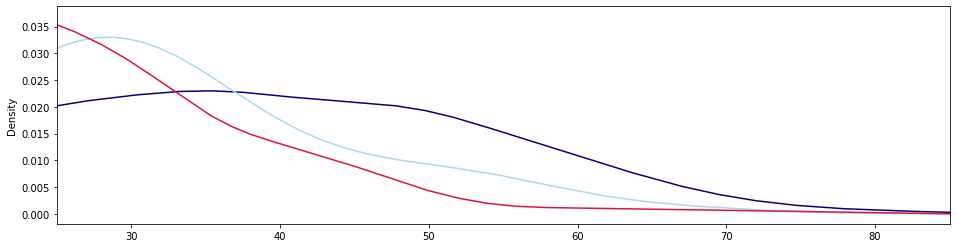

In [0]:
# adjusting xlim range
titanic[titanic['Pclass']==1]['Age'].plot(kind='density', xlim=(25, 85), figsize=(16,4), color='navy')
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', xlim=(25, 85), figsize=(16,4), color='lightblue')
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', xlim=(25, 85), figsize=(16,4), color='crimson');

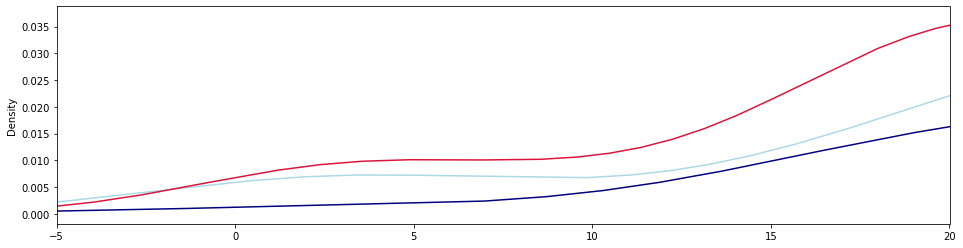

In [0]:
# adjusting xlim range
titanic[titanic['Pclass']==1]['Age'].plot(kind='density', xlim=(-5, 20), figsize=(16,4), color='navy')
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', xlim=(-5, 20), figsize=(16,4), color='lightblue')
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', xlim=(-5, 20), figsize=(16,4), color='crimson');

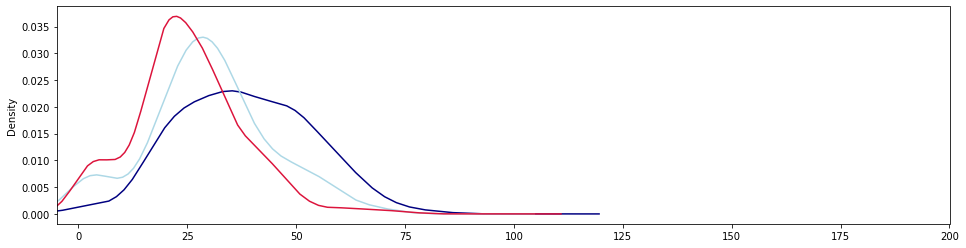

In [0]:
# adjusting xlim range
titanic[titanic['Pclass']==1]['Age'].plot(kind='density', xlim=(-5, 200), figsize=(16,4), color='navy')
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', xlim=(-5, 200), figsize=(16,4), color='lightblue')
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', xlim=(-5, 200), figsize=(16,4), color='crimson');

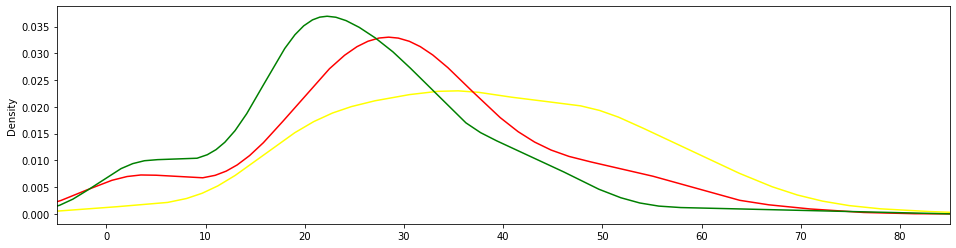

In [0]:
# adjusting color
titanic[titanic['Pclass']==1]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='yellow')
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='red')
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='green');

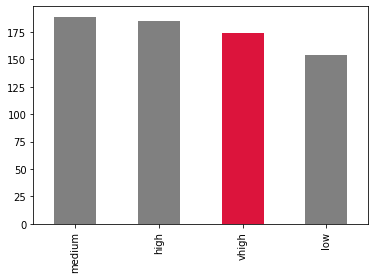

In [0]:
# lets display a single categorical variable using a Bar Chart
# lets use colors to make a particular value 'pop'!

titanic['fare_groups'].value_counts().plot(kind='bar', color=['gray', 'gray', 'crimson', 'gray']);

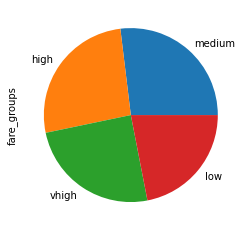

In [0]:
# lets display a single categorical variable using a Pie Chart

titanic['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

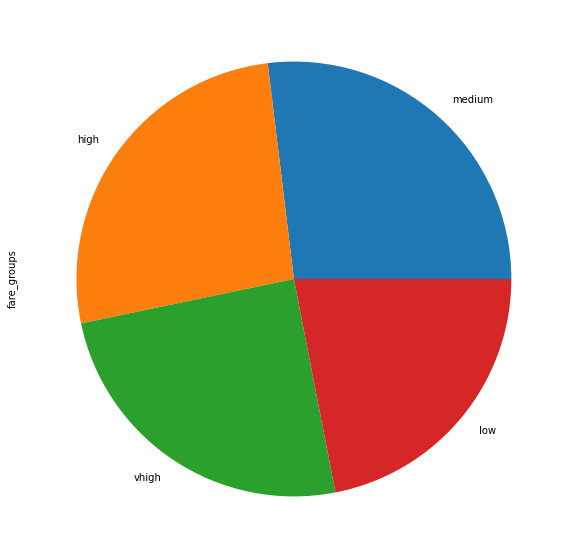

In [0]:
# adjusting figsize
titanic['fare_groups'].value_counts().plot(kind='pie', figsize=(10,10));


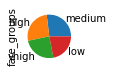

In [0]:
# adjusting figsize
titanic['fare_groups'].value_counts().plot(kind='pie', figsize=(1,1));

In [0]:
# compare 2 categorical values using crosstabs

cab_death = pd.crosstab(titanic['cabin_class'], titanic['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
thrird,270,85


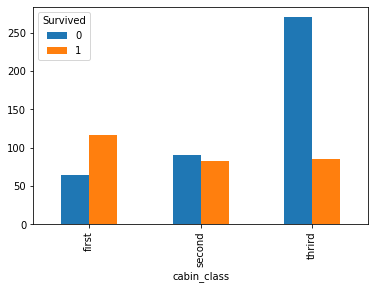

In [0]:
# lets plot the cab_death using a bar graph
cab_death.plot(kind='bar');

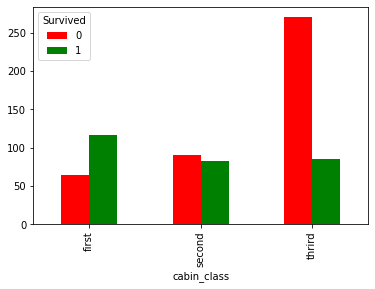

In [0]:
cab_death.plot(kind='bar', color=['red', 'green']);

In [0]:
# lets crosstab the same data with Column Percents
# normalizing columns - the percent is total down the columns
cab_death1 = pd.crosstab(titanic['cabin_class'], titanic['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
thrird,0.636792,0.298246


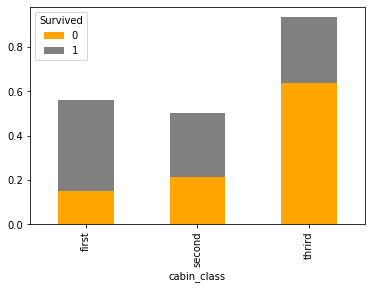

In [0]:
# lets make a Stacked Bar Chart - for easy comparison of two categorical variables.
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

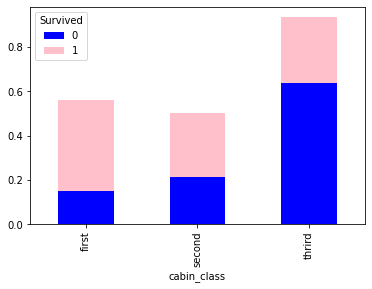

In [0]:
cab_death1.plot(kind='bar', stacked=True, color=['blue', 'pink']);

In [0]:
# lets crosstab the same data with Column Percents
# normalizing index - the percent is total across the rows
cab_death2 = pd.crosstab(titanic['cabin_class'], titanic['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
thrird,0.760563,0.239437


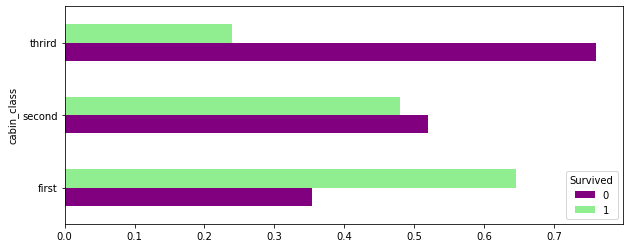

In [0]:
# lets do a Horizonatal Paired Bar Chart for comparison of two categorical variables.
# Note the use of 'barh'
cab_death2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,4)) ;

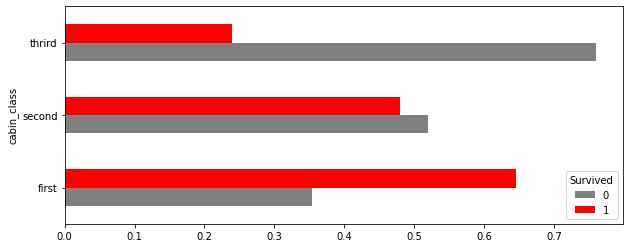

In [0]:
# adjusting color
cab_death2.plot(kind='barh', color=['gray', 'red'], figsize=(10,4));

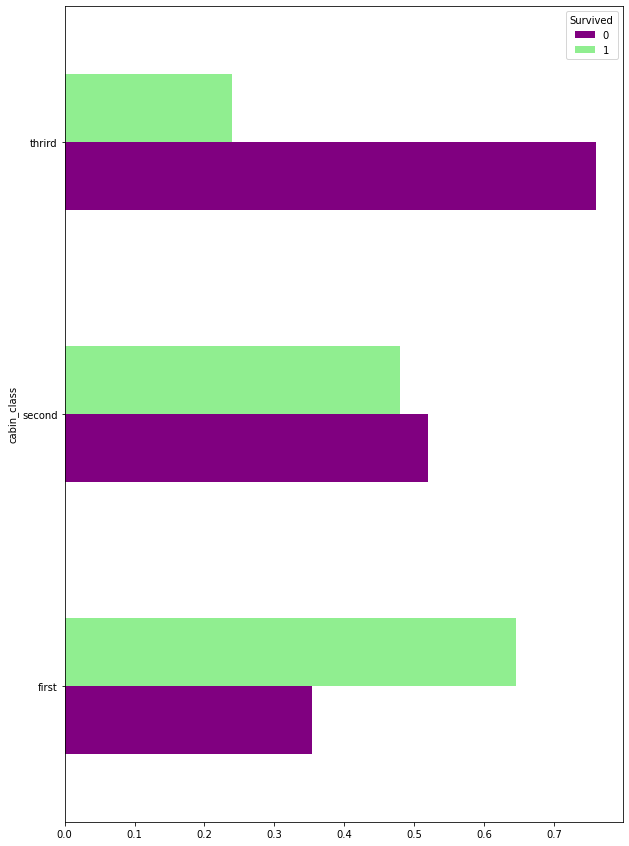

In [0]:
# adjusting the y - figsize
cab_death2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,15)) ;

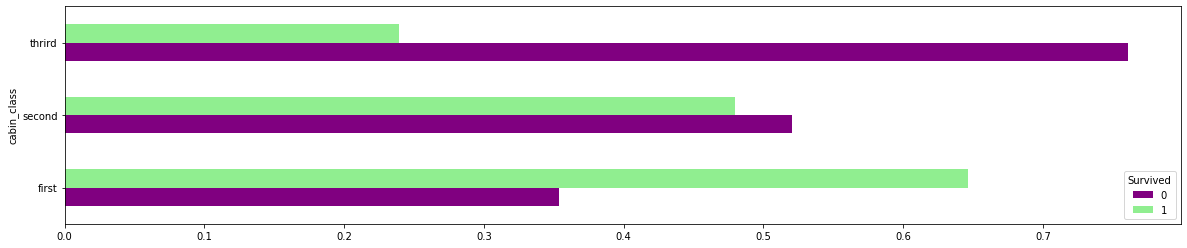

In [0]:
# adjusting the x -figsize
cab_death2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(20,4)) ;

In [0]:
# lets look at a single continous variable
# we will look at Age
# we will take its average

titanic['Age'].mean()

29.618011283497882

In [0]:
# now lets take a look at the continous variable 'Age' by breaking it down into the categoriacl value 'cabin_class'
# we will do this using - groupby 

cab_age = titanic.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
thrird    25.140620
Name: Age, dtype: float64

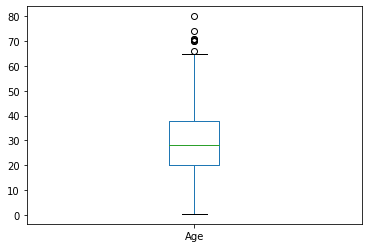

In [0]:
# visuaizing a single continous variable by using, .plot kind=box

titanic['Age'].plot(kind='box');

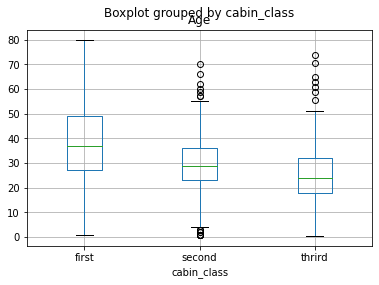

In [0]:
# BUT visualize a continous variable breaking out by a categorical variable use .boxplot

titanic.boxplot(column='Age', by='cabin_class');

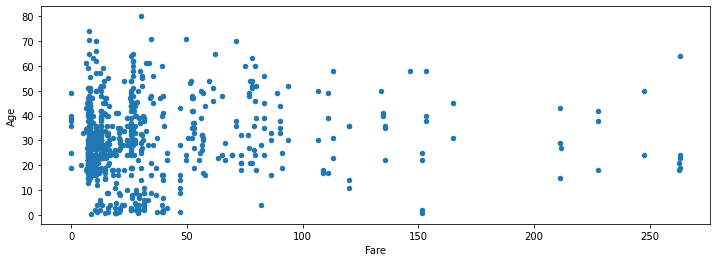

In [0]:
# Lets compare 2  continuous variables
# we will compare 'Age' and 'Fare'
# we will use a Scatter plot

titanic.plot(kind= 'scatter', x='Fare', y='Age', figsize=(12,4));

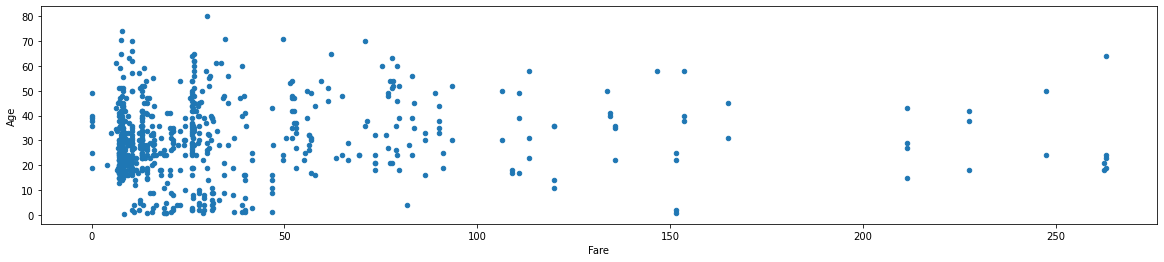

In [0]:
titanic.plot(kind= 'scatter', x='Fare', y='Age', figsize=(20,4));

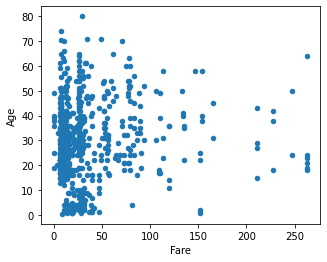

In [0]:
titanic.plot(kind= 'scatter', x='Fare', y='Age', figsize=(5,4));

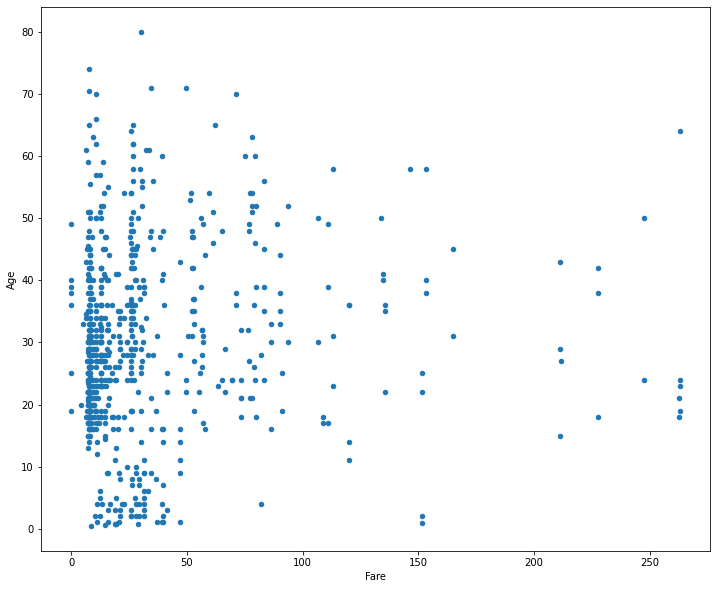

In [0]:
titanic.plot(kind= 'scatter', x='Fare', y='Age', figsize=(12,10));

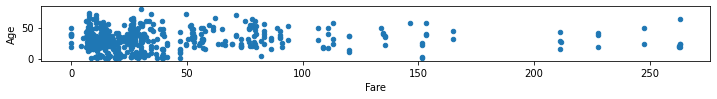

In [0]:
titanic.plot(kind= 'scatter', x='Fare', y='Age', figsize=(12,1));

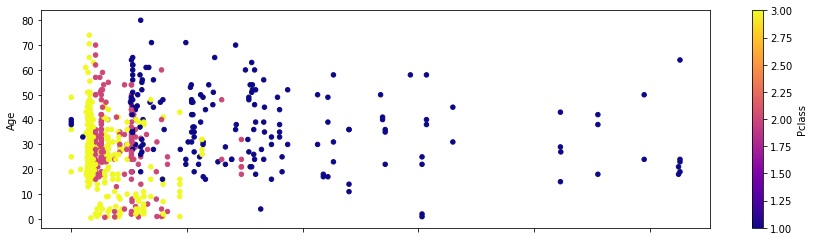

In [0]:
# Lets compare 3 continous variables
# we will compare 'Age', 'Fare', 'Pclass'
# we will use a Scatter plot


titanic.plot(kind ='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(15,4));

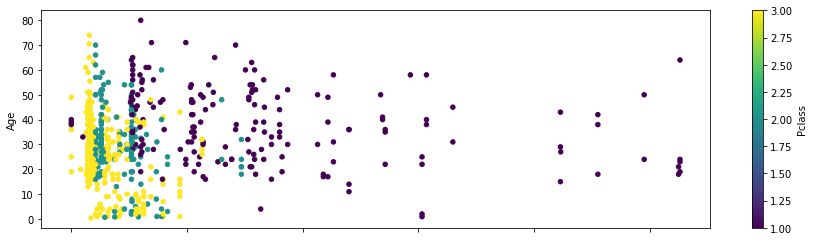

In [0]:
# adjusting colormap
titanic.plot(kind ='scatter', x='Fare', y='Age', c='Pclass', colormap='viridis', figsize=(15,4));

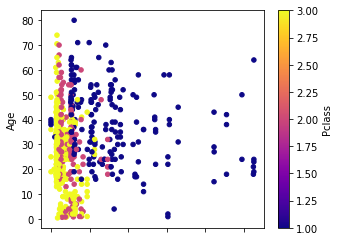

In [0]:
# adjusting x-figsize
titanic.plot(kind ='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(5,4));

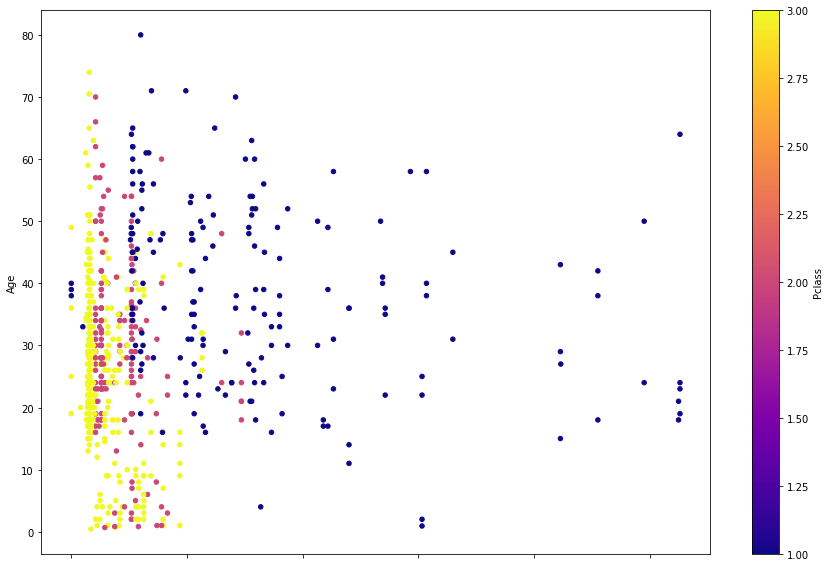

In [0]:
# adjusting y-figsize
titanic.plot(kind ='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(15,10 ));

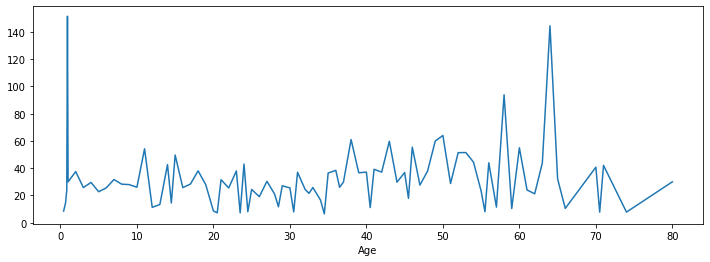

In [0]:
# lets examine 2 continous varibles using a Line chart
# we will examine 'Age' and 'Fare'
# we will use a groupby and call the mean 

titanic.groupby('Age')['Fare'].mean().plot(figsize=(12,4));

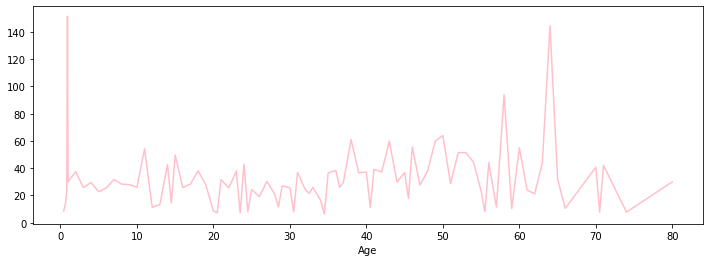

In [0]:
# adjusting color
titanic.groupby('Age')['Fare'].mean().plot(figsize=(12,4), color='pink');

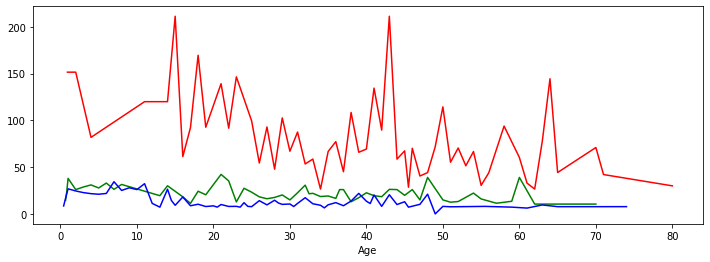

In [0]:
# lets create a loop - utilizing groupby and mean
# we will loop through 'Pclass', 'Age' and 'Fare'
# 1st list the colors

mycolors=['red', 'green', 'blue']

for x in [1,2,3]:
    titanic[titanic['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), 
                                                                     color=mycolors[x-1])

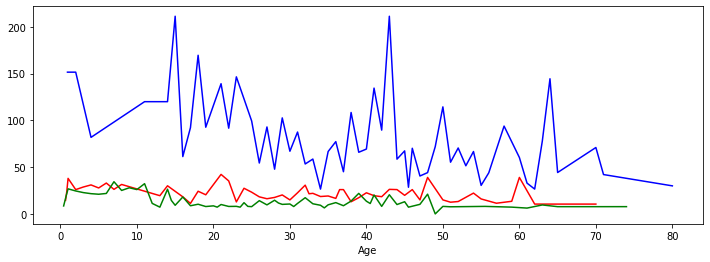

In [0]:
mycolors=['red', 'green', 'blue']

for x in [1,2,3]:
    titanic[titanic['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), 
                                                                     color=mycolors[x-2])

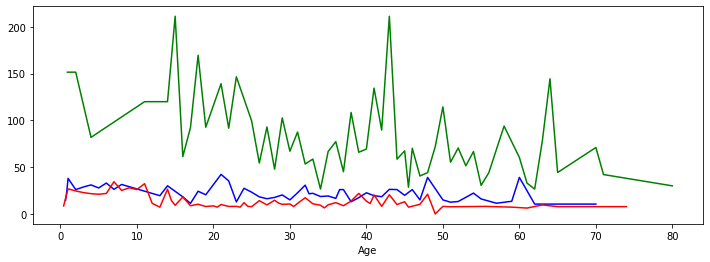

In [0]:
mycolors=['red', 'green', 'blue']

for x in [1,2,3]:
    titanic[titanic['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), 
                                                                     color=mycolors[x-3])

In [0]:
# Let compare Multiple Continuous Variables
# we will use the correlation matrix

corr_matrix = titanic.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


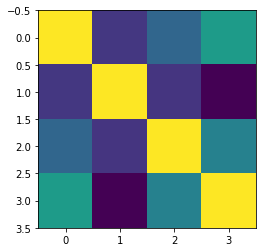

In [0]:
# lets display this correlation matrix using a Heatmap

plt.imshow(corr_matrix);

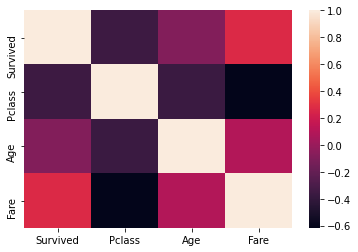

In [0]:
# # lets display this correlation matrix using a Heatmap in Seaborn code

sns.heatmap(corr_matrix);

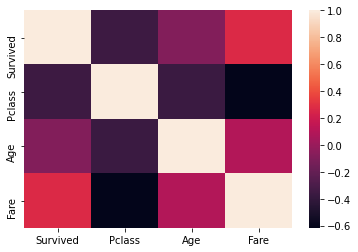

In [0]:
sns.heatmap(corr_matrix)

## Matplotlib


In [0]:
# example using numpy arrays.
# Note: you can also use list but will most likely be passing numpy arrays of pandas columns
# here is the data we will plot

import numpy as np

x = np.linspace(0, 5, 11)
y = x ** 2

In [0]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [0]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

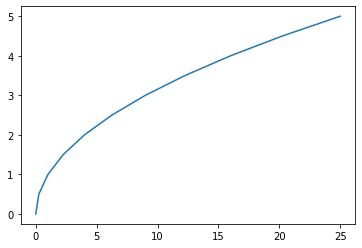

In [0]:
# a very simple plot, to get started. Notice that NO PANDAS is required!

plt.plot(y,x);

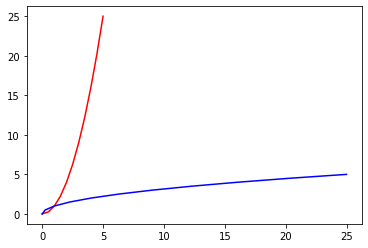

In [0]:
# lets make 2 'plt' plots together and add some color

plt.plot(x, y, 'r')
plt.plot(y, x, 'b');

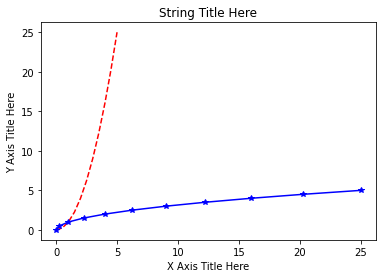

In [0]:
# lets add labels and texture to our 2 'plt' plots

plt.plot(x, y, 'r--')
plt.plot(y, x, 'b*-')
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here');

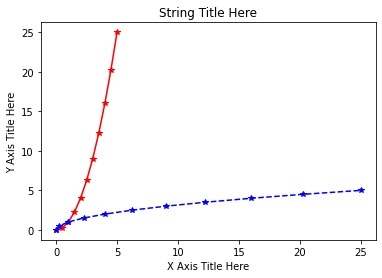

In [0]:
# adjusting texture
plt.plot(x, y, 'r-*')
plt.plot(y, x, 'b*--')
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here');

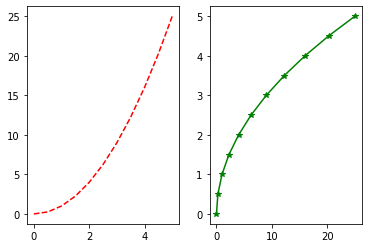

In [0]:
# lets create Multiplots on the same or 1 canvas
# The basic syntax goes like this: plt.subplot(nrows, ncols, plot_number)

plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

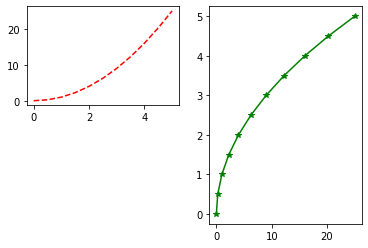

In [0]:
# adjusting number of row for 1st plot
plt.subplot(2,2,1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

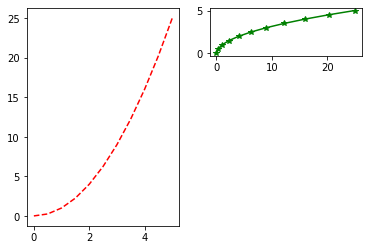

In [0]:
# adjusting number of row for 2nd plot
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.subplot(4,2,2)
plt.plot(y, x, 'g*-');

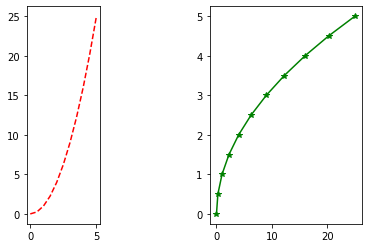

In [0]:
# adjusting the number of columns in 1st plot
plt.subplot(1,4,1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

The .figure() method


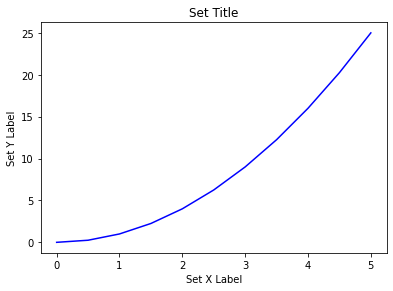

In [0]:
# to start lets create a figure instance. then we can add axes to that figure.

# create a Figure (empty canvas)

fig = plt.figure()      # lets Add Set of Axes to that Figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)# now lets Plot on that Set of Axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label')  # Notice the use of set_to begin methods
axes.set_ylabel('Set Y Label')
axes.set_title('Set Title');

Code is a little more complicated, but the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

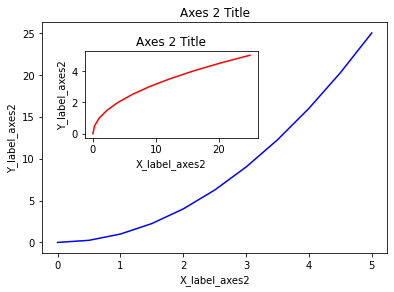

In [0]:
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes
axes1.plot(x, y, 'b') # Larger Figure Axes1
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

The subplots() method

The plt.subplots() object will act as a more automatic axis manager. It is somewhat more common than using .figure()

plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png')). You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus:

fig, ax = plt.subplots()

is more concise than this:

fig = plt.figure()
ax = fig.add_subplot(111)
https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python


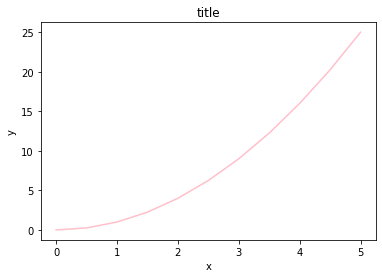

In [0]:
# this usee tuple unpacking to to grab fig and axes

fig, axes = plt.subplots(nrows=1, ncols=1)
axes.plot(x, y, 'pink')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');



Then you can specify the number of rows and columns when creating the subplots() object:

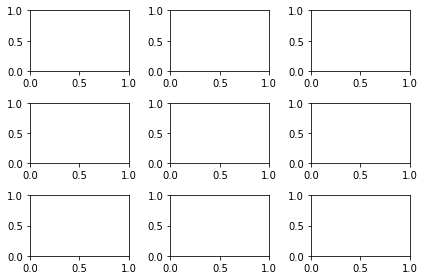

In [0]:
# empty canvas of 1 by 2 subplots

fig, axes = plt.subplots(nrows=3, ncols=3)
fig
plt.tight_layout()

In [0]:
# Axes is an Array of Axes to plot on
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2604a12d30>,
      dtype=object)

We can iterate through this array:

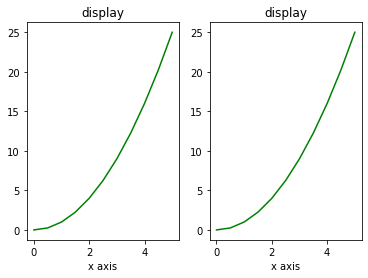

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2)
# lets display the Figure object
for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x axis')
    ax.set_title('display')
plt;

A common issue with matplolib is overlapping subplots or figures. We ca use fig.tight_layout() or plt.tight_layout() method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

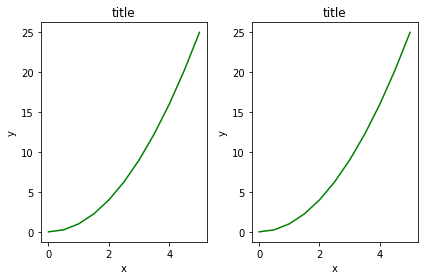

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
fig
plt.tight_layout()

Figure size, aspect ratio and DPI
Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the figsize and dpi keyword arguments.

figsize is a tuple of the width and height of the figure in inches
dpi is the dots-per-inch (pixel per inch).
For example:

In [0]:
fig = plt.figure(figsize=(8,4),  dpi=100)

<Figure size 800x400 with 0 Axes>


The same arguments can also be passed to layout managers, such as the subplots function:


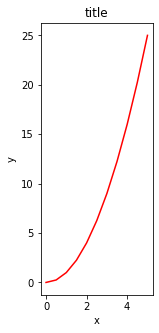

In [0]:
fig, axes = plt.subplots(figsize=(2, 5))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Legends, labels and titles
Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

Figure titles

A title can be added to each axis instance in a figure. To set the title, use the set_title method in the axes instance:

In [0]:
ax.set_title("title");   #notice the double quotation marks

Axis labels

Similarly, with the methods set_xlabel and set_ylabel, we can set the labels of the X and Y axes:

In [0]:
ax.set_xlabel("x")   #notice the double quotation marks
ax.set_ylabel("y");

Legends
You can use the label="label text" keyword argument when plots or other objects are added to the figure, and then using the legend method without arguments to add the legend to the figure:

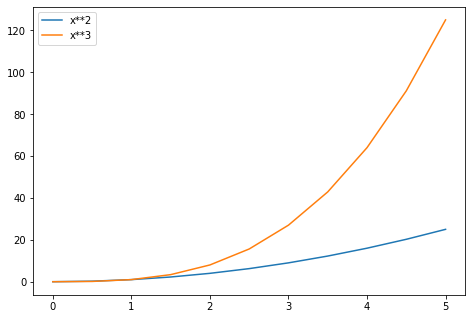

In [0]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax
ax.plot(x,  x**2, label="x**2")
ax.plot(x,  x**3, label="x**3")
ax.legend();

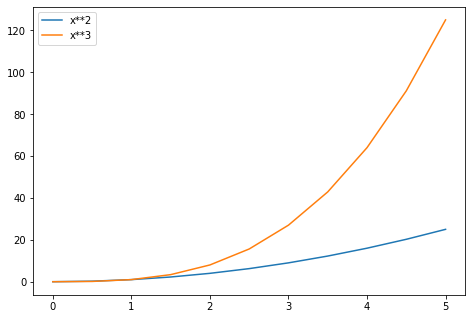

In [0]:
fig = plt.figure()

ax = fig.add_axes([1,0,1,1])
ax
ax.plot(x,  x**2, label="x**2")
ax.plot(x,  x**3, label="x**3")
ax.legend();

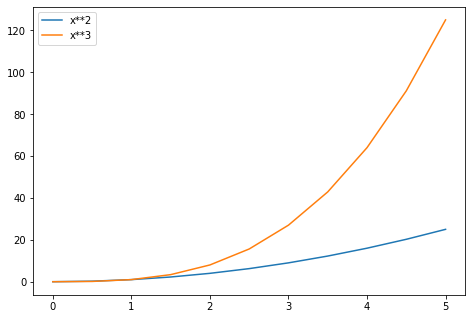

In [0]:
fig = plt.figure()

ax = fig.add_axes([0,1,1,1])
ax
ax.plot(x,  x**2, label="x**2")
ax.plot(x,  x**3, label="x**3")
ax.legend();

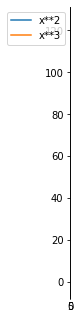

In [0]:
fig = plt.figure()

ax = fig.add_axes([0,0,0,1])
ax
ax.plot(x,  x**2, label="x**2")
ax.plot(x,  x**3, label="x**3")
ax.legend();

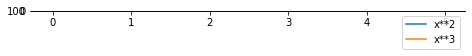

In [0]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,0])
ax
ax.plot(x,  x**2, label="x**2")
ax.plot(x,  x**3, label="x**3")
ax.legend();

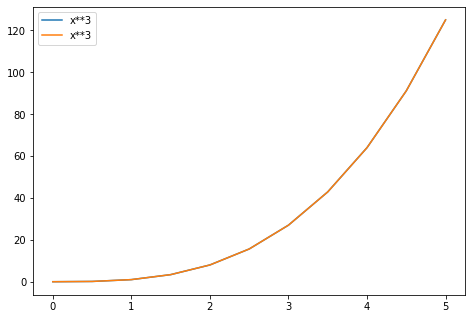

In [0]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax
ax.plot(x,  x**3, label="x**3")
ax.plot(x,  x**3, label="x**3")
ax.legend();

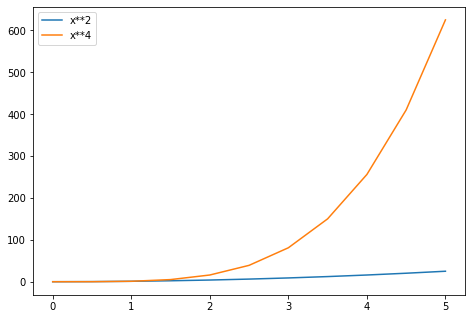

In [0]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax
ax.plot(x,  x**2, label="x**2")
ax.plot(x,  x**4, label="x**4")
ax.legend();

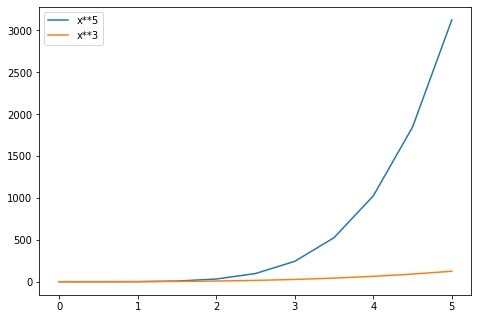

In [0]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax
ax.plot(x,  x**5, label="x**5")
ax.plot(x,  x**3, label="x**3")
ax.legend();

The legend function takes an optional keyword argument loc that can be used to specify where in the figure the legend is to be drawn. The allowed values of loc are numerical codes for the various places the legend can be drawn. See the documentation page for details. Some of the most common loc values are:

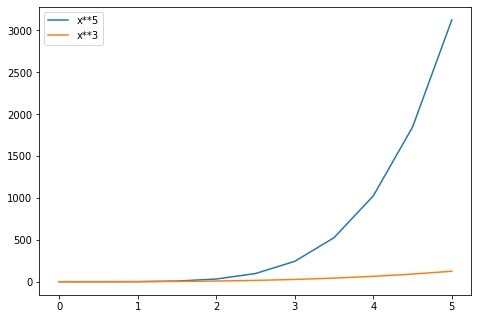

In [0]:
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
ax.legend()
fig

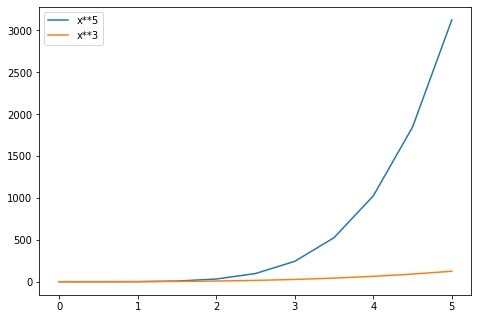

In [0]:
ax.legend(loc=10) # upper right corner
ax.legend(loc=9) # upper left corner
ax.legend(loc=8) # lower left corner
ax.legend(loc=7) # lower right corner
ax.legend()
fig

Setting colors, linewidths, linetypes
Matplotlib gives you a lot of options for customizing colors, linewidths, and linetypes.

There is the basic MATLAB like syntax (which I would suggest you avoid using for more clairty sake:

Colors with MatLab like syntax
With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where 'b' means blue, 'g' means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

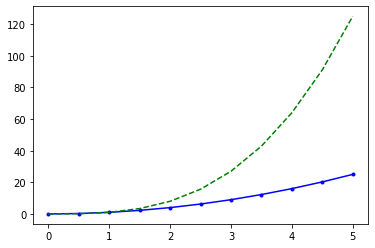

In [0]:
# MATLAB style line color and style

fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

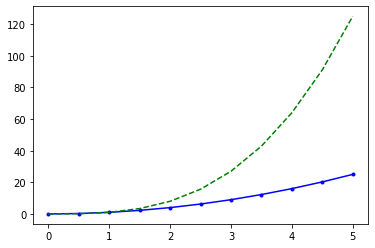

In [0]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--'); # green dashed line

Colors with the color= parameter
We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the color and alpha keyword arguments. Alpha indicates opacity.

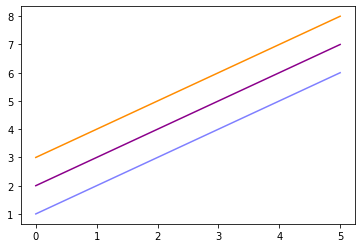

In [0]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5)  # half-transparent
ax.plot(x, x+2, color="#8B008B")  # RGB hex code
ax.plot(x, x+3, color="#FF8C00")  #RGB hex code

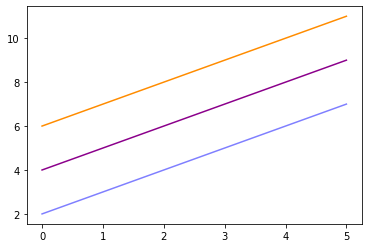

In [0]:
fig, ax = plt.subplots()

ax.plot(x, x+2, color="blue", alpha=0.5)  # half-transparent
ax.plot(x, x+4, color="#8B008B")  # RGB hex code
ax.plot(x, x+6, color="#FF8C00")  #RGB hex code

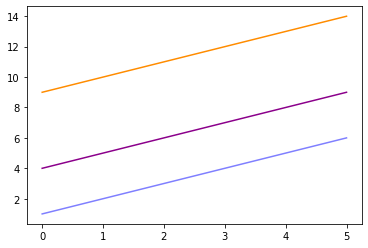

In [0]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5)  # half-transparent
ax.plot(x, x+4, color="#8B008B")  # RGB hex code
ax.plot(x, x+9, color="#FF8C00")  #RGB hex code

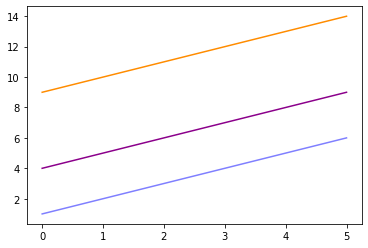

In [0]:
fig, ax = plt.subplots()
# using single quotations - no difference

ax.plot(x, x+1, color='blue', alpha=0.5)  # half-transparent
ax.plot(x, x+4, color='#8B008B')  # RGB hex code
ax.plot(x, x+9, color='#FF8C00');  #RGB hex code

Line and marker styles
To change the line width, we can use the linewidth or lw keyword argument. The line style can be selected using the linestyle or ls keyword arguments:

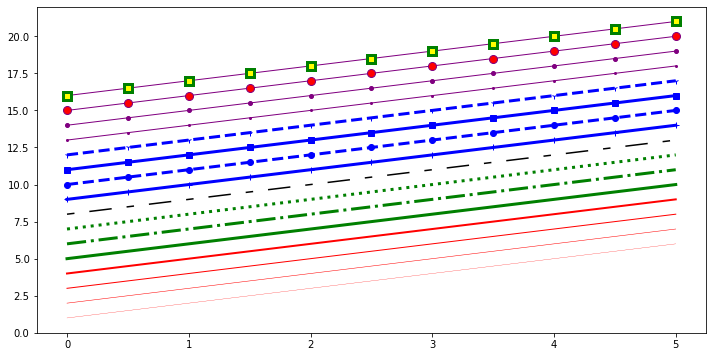

In [0]:
# displaying how to create multiple lines with varying designs 

fig, ax = plt.subplots(figsize=(12,6)) 

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

Control over axis appearance
In this section we will look at controlling axis sizing properties in a matplotlib figure.

Plot range
We can configure the ranges of the axes using the set_ylim and set_xlim methods in the axis object, or axis('tight') for automatically getting "tightly fitted" axes ranges:



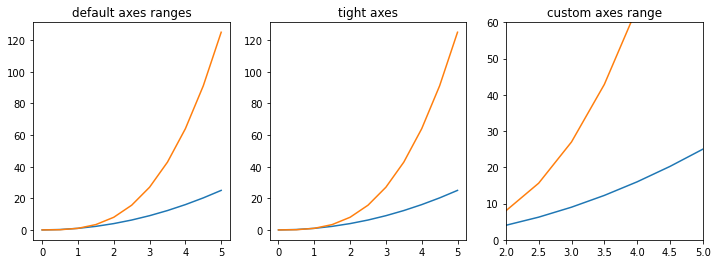

In [0]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

Imitate a real-world example
Today we will reproduce this example by FiveThirtyEight:

In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example =Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links

[Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)

[Remove to improve (the data-ink ratio)t](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)

[How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)




Make fake prototypes
This helps us understand the problem

In [0]:
# what styles are available in matplotlib?

print(plt.style.available[:5])
plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']


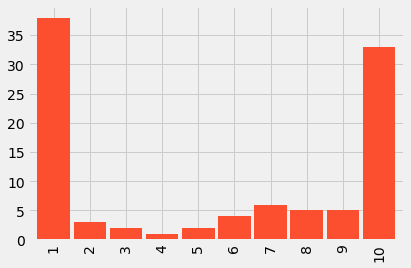

In [0]:
# create fake data to replace the blog post figure.

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

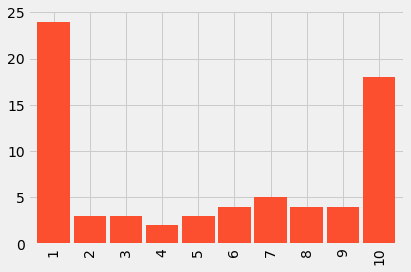

In [0]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

Annotate with Text


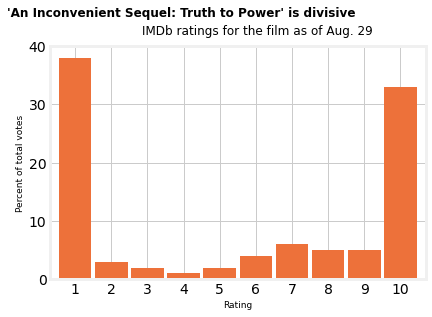

In [0]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")

# set the bars

fake.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="white")

# set the title and subtitle

ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')

ax.text(s="IMDb ratings for the film as of Aug. 29", 
        fontsize=12, x=1.85, y=42);

# set the x and y axes labels

ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# fix the x and y axis tick marks and grid

ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10)); 

In [0]:
display(example)

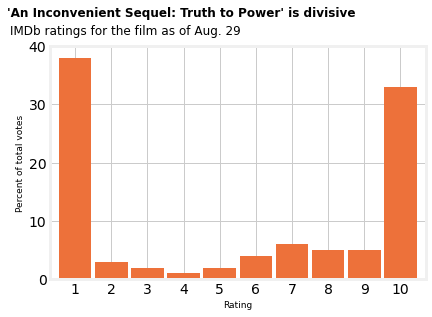

In [0]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")

# set the bars

fake.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="white")

# set the title and subtitle

ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')

ax.text(s="IMDb ratings for the film as of Aug. 29", 
        fontsize=12, x=-1.8, y=42);

# set the x and y axes labels

ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# fix the x and y axis tick marks and grid

ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10)); 

Reproduce with real data
Using this dataset relies on us making two discoveries:

1) The dataset shows logs of the data at different timestamps and these timestamps are cumulative, meaning that it has all of the ratings as earlier timestamps, but with the new ones added on top. 2) The dataset logs ratings breakdowns for a bunch of different demographic groups per timestamp.

Once we realize these two things, we realize that we only really need 1 line of this dataset to make our graphic, it's the last line that holds the ratings for all IMDb users for the very last time stamp.

In [0]:
# read the data from 538's github repo
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
# convert timestamps strings to actual datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
# use the timestamps strings to actual datetime objects
# so that we can select rows by timestamp
df.set_index('timestamp', inplace=True)

In [0]:
# grab only the rows corresponding to the last day
lastday = df['2017-08-29']

In [0]:
# get the demographic breakdowns for all IMDb users on the last day
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# just grab the very last line (latest timestamp) of IMDb user ratings
# this should be the most up to date data from the dataset
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [0]:
# Grab only the percentage columns since we don't care about the raw 
# counts in making our graph
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [0]:
# Reset the index so that it's numeric again
# and rename the percent column for easy access in our plotting
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


Generate the Figure


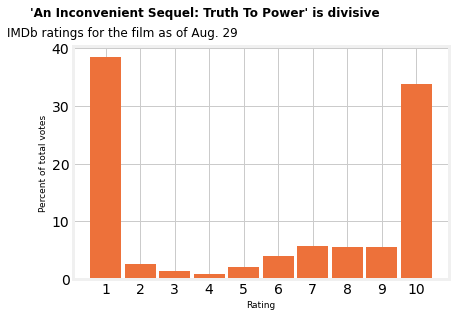

In [0]:
fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [0]:
url = 'https://fivethirtyeight.com/wp-content/uploads/2018/06/koeze-ambj-masc-11.png?w=575'
MyTry =Image(url=url, width=400)

display(MyTry)

In [0]:
data = {'All adult men': [.6, .4], '18-34':[70, 30], '35-64':[58, 42], '65+': [52, 48], 'Yes_NO': [0,1]}
myfake = pd.DataFrame.from_dict(data)
myfake

,All adult men,18-34,35-64,65+,Yes_NO
0,0.6,70,58,52,0
1,0.4,30,42,48,1


In [0]:
myfake.shape

(2, 5)

In [0]:
myfake1 = pd.crosstab(myfake['All adult men'], myfake['Yes_NO'], normalize='columns')
myfake1

Yes_NO,0,1
All adult men,,
0.4,0.0,1.0
0.6,1.0,0.0


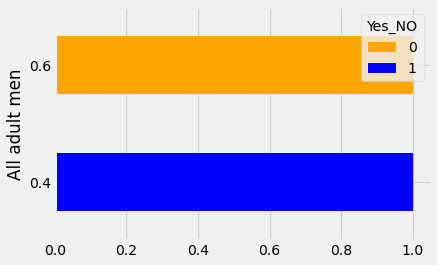

In [0]:
myfake1.plot(kind='barh', stacked=True, color=['orange', 'blue']);

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here